# Base de données


Attention : refaire cette partie en dosant ce qu'on met ds le rapport ou pas
Et décrire les bases et tout, en définissant ce que c'est qu'un musée tt ça


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

df = pd.read_csv("../output/df_modele_musees.csv")
df.head()

,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,annee_creation,latitude,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,has_excel,est_idf
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,1960.0,48.410166,7.451102,4550.0,54.0,0,NaN,NaN,1,0
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,1960.0,48.410166,7.451102,3808.0,55.0,0,4550.0,-0.163077,1,0
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,1960.0,48.410166,7.451102,3114.0,56.0,0,3808.0,-0.182248,1,0
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,1960.0,48.410166,7.451102,2444.0,57.0,0,3114.0,-0.215157,1,0
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,1960.0,48.410166,7.451102,3590.0,58.0,0,2444.0,0.468903,1,0


In [3]:
#Aperçus du dataframe
df.info()

#attention : une ligne = un musée pr une année

#Stats desc sur le total de frequentation
df["total"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_patrimostat               11250 non-null  object 
 1   id_museofile                 11230 non-null  object 
 2   dateappellation              11230 non-null  object 
 3   ferme                        11223 non-null  object 
 4   anneefermeture               1015 non-null   object 
 5   ville                        11250 non-null  object 
 6   codeInseeCommune             11250 non-null  object 
 7   annee                        11250 non-null  int64  
 8   payant                       11249 non-null  float64
 9   gratuit                      11249 non-null  float64
 10  total                        11248 non-null  float64
 11  individuel                   9855 non-null   float64
 12  scolaires                    9913 non-null   float64
 13  groupes_hors_sco

count    1.124800e+04
mean     5.018695e+04
std      3.477633e+05
min      0.000000e+00
25%      2.029500e+03
50%      8.481000e+03
75%      2.650125e+04
max      1.010596e+07
Name: total, dtype: float64

# Stats descriptives


## Analyse globale de la fréquentation

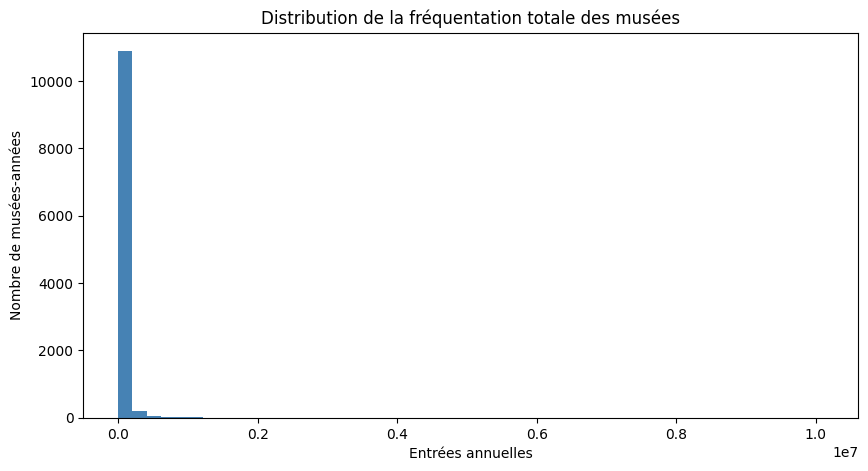

In [4]:
#histogramme pr voir distrib
plt.figure(figsize=(10,5))
plt.hist(df["total"], bins=50, color="steelblue")
plt.title("Distribution de la fréquentation totale des musées")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()





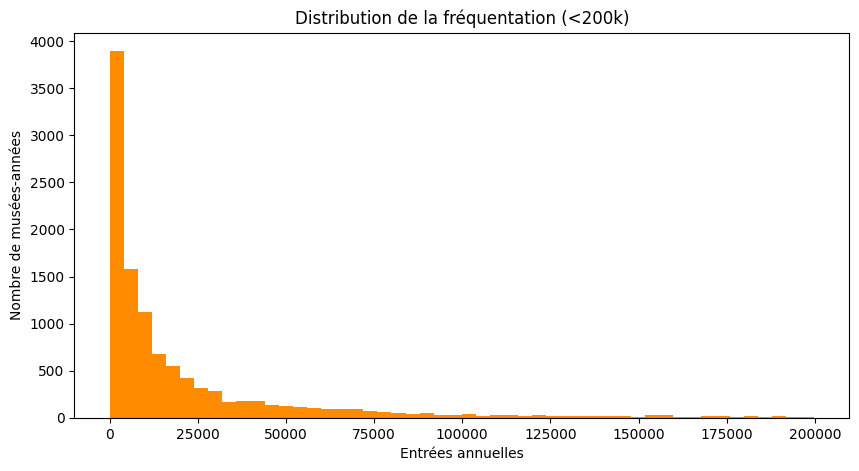

In [5]:
#on remarque les valeurs aberrantes dues aux gros musées
df_sub = df[df["total"] < 200000]

plt.figure(figsize=(10,5))
plt.hist(df_sub["total"], bins=50, color="darkorange")
plt.title("Distribution de la fréquentation (<200k)")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()

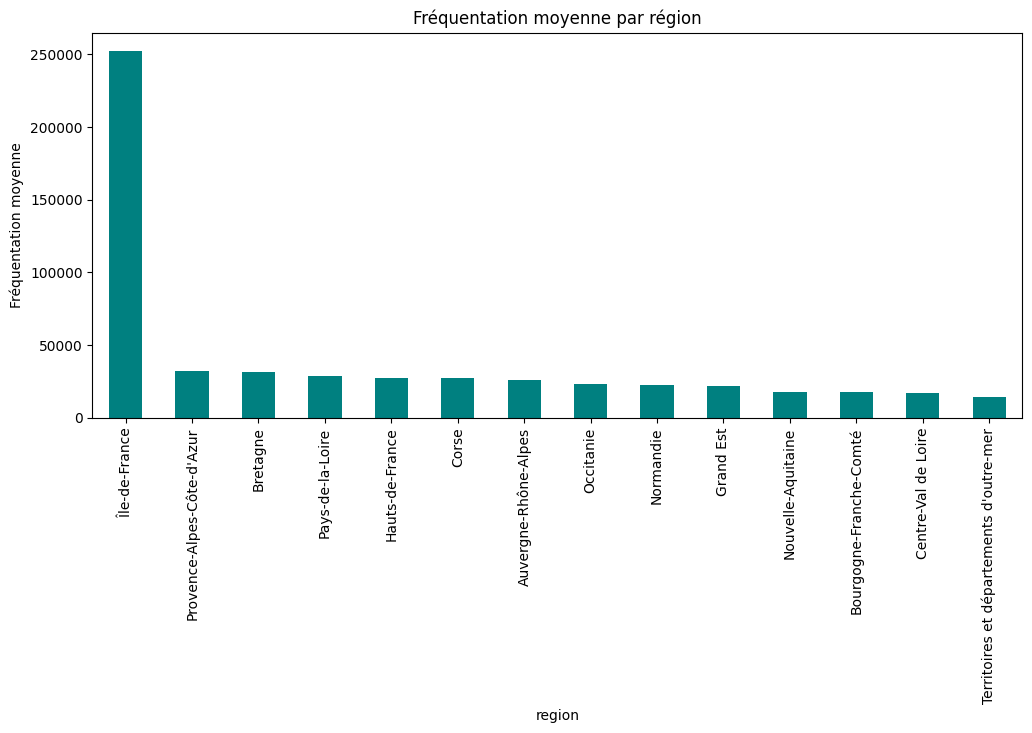

In [6]:
#freq par region
df_reg = (
    df.groupby("region")["total"]
      .mean()
      .sort_values(ascending=False)
)

df_reg.plot(kind="bar", figsize=(12,5), color="teal")
plt.title("Fréquentation moyenne par région")
plt.ylabel("Fréquentation moyenne")
plt.show()


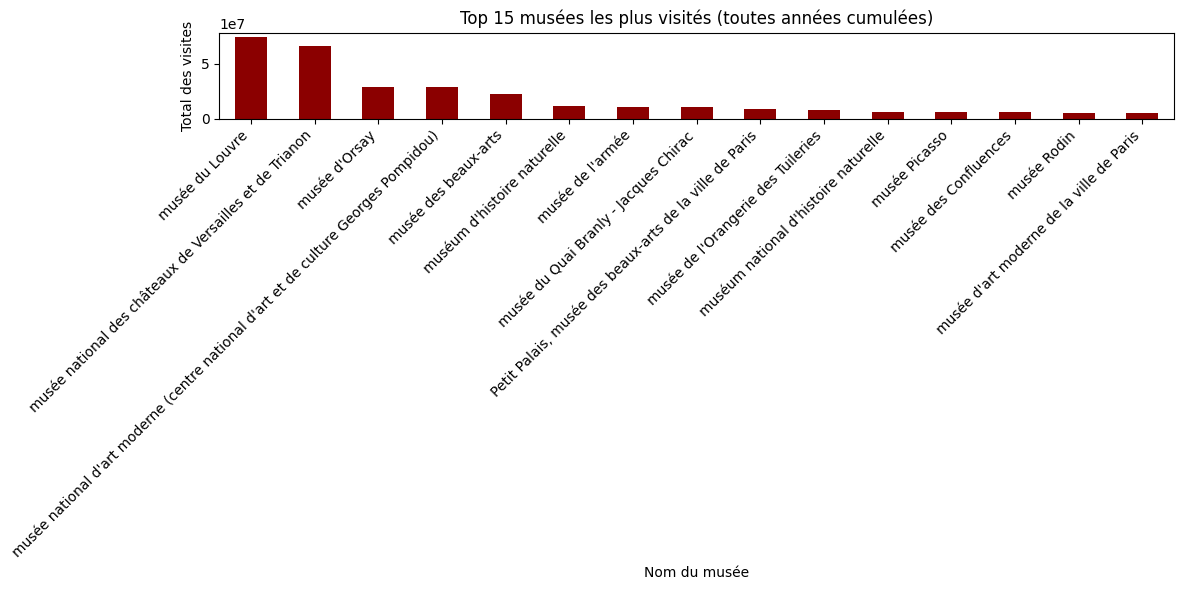

In [7]:
#top15 des musées les plus freq
top_musees = (
    df.groupby("nom_officiel")["total"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
top_musees.plot(kind="bar", color="darkred")
plt.title("Top 15 musées les plus visités (toutes années cumulées)")
plt.ylabel("Total des visites")
plt.xlabel("Nom du musée")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#voir hors idf


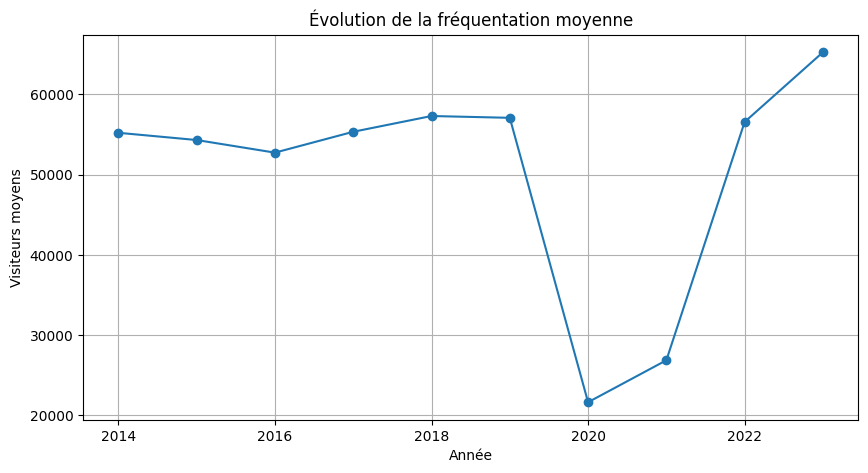

In [8]:
#Evolution temporelle (attention chiffres en milliers)
df_year = df.groupby("annee")["total"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_year["annee"], df_year["total"], marker="o")
plt.title("Évolution de la fréquentation moyenne")
plt.xlabel("Année")
plt.ylabel("Visiteurs moyens")
plt.grid(True)
plt.show()


## Analyse régionale

In [9]:
#DF GEO 
# On enlève les lignes sans coordonnées
df_geo = df.dropna(subset=["latitude", "longitude"]).copy()

# Création de la colonne geometry à partir de lon/lat
gdf_points = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]),
    crs="EPSG:4326"  # WGS84, le classique lat/lon
)

gdf_points.head()


,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,latitude,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,has_excel,est_idf,geometry
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,48.410166,7.451102,4550.0,54.0,0,NaN,NaN,1,0,POINT (7.4511 48.41017)
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,48.410166,7.451102,3808.0,55.0,0,4550.0,-0.163077,1,0,POINT (7.4511 48.41017)
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,48.410166,7.451102,3114.0,56.0,0,3808.0,-0.182248,1,0,POINT (7.4511 48.41017)
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,48.410166,7.451102,2444.0,57.0,0,3114.0,-0.215157,1,0,POINT (7.4511 48.41017)
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,48.410166,7.451102,3590.0,58.0,0,2444.0,0.468903,1,0,POINT (7.4511 48.41017)


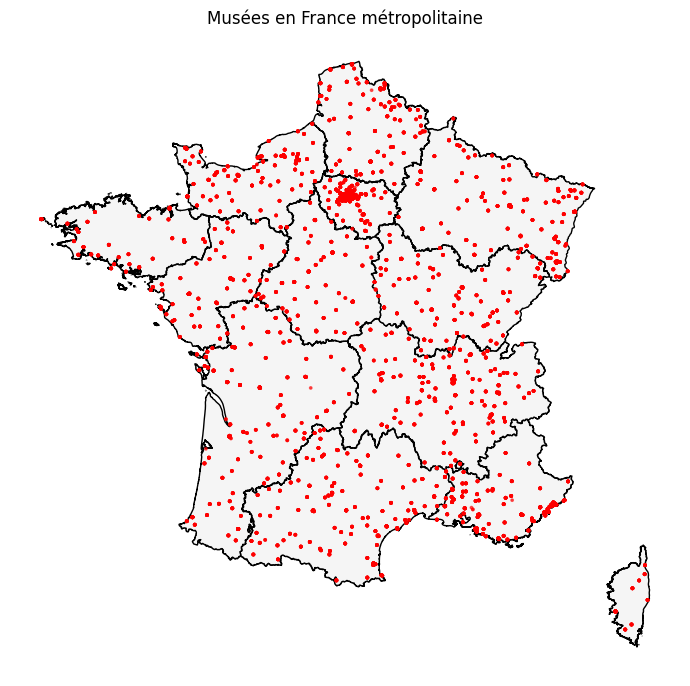

In [10]:
from cartiflette import carti_download
#carte des musées en FR métro
#Filtre France métropolitaine sur les points
mask_metropole = (
    gdf_points.geometry.y.between(41, 52) &   # latitude
    gdf_points.geometry.x.between(-6, 10)     # longitude
)
gdf_points_metropole = gdf_points[mask_metropole].copy()

#Télécharger la carte des régions
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# garder seulement la métropole
france = france.loc[france["INSEE_REG"] > 10]

#Tracer
fig, ax = plt.subplots(figsize=(7, 9))

# fond de carte
france.plot(ax=ax, color="whitesmoke", edgecolor="black")

# taille des points bornée (évite la grosse tache)
ms = np.clip(gdf_points_metropole["total"] / 100000, 3, 20)

gdf_points_metropole.plot(
    ax=ax,
    markersize=ms,
    color="red",
    alpha=0.6
)

ax.set_title("Musées en France métropolitaine")
ax.set_axis_off()
plt.tight_layout()
plt.show()

#coucou les filles

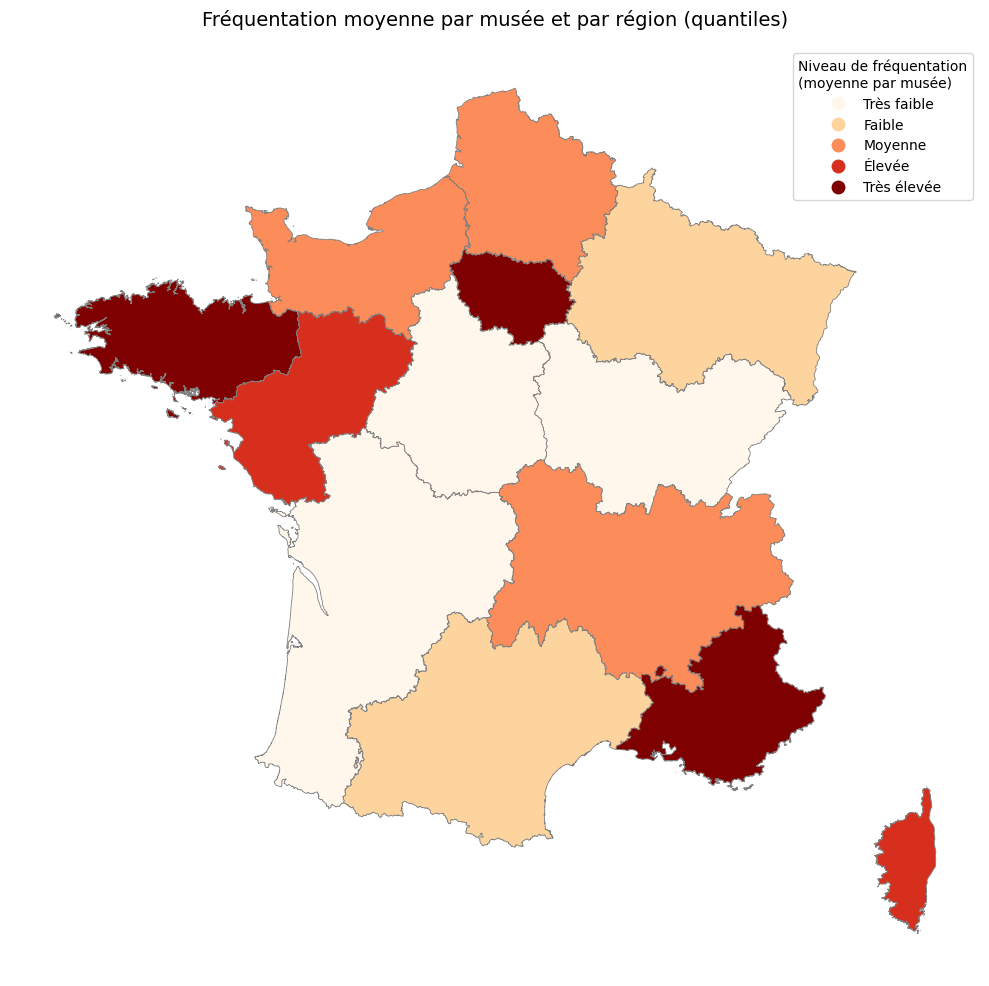

In [11]:
#CARTE FREQ MOY
import mapclassify


#Fréquentation moyenne par musée dans chaque région
df_region = (
    df.groupby("region")
      .agg(
          visites_totales=("total", "sum"),
          nb_musees=("id_museofile", "nunique")
      )
)

df_region["freq_par_musee"] = df_region["visites_totales"] / df_region["nb_musees"]
df_region = df_region.reset_index()

#Fonction de normalisation des noms de régions
def normalize_name(s):
    """Met les noms de région en minuscule, enlève les espaces et harmonise les tirets."""
    if pd.isna(s):
        return np.nan
    s = str(s).lower()
    s = s.replace("–", "-").replace("—", "-")  # différents tirets → '-'
    s = s.replace("  ", " ")
    return s.strip()

#réer region_clean côté données et côté carte
df_region["region_clean"] = df_region["region"].apply(normalize_name)
france["region_clean"] = france["LIBELLE_REGION"].apply(normalize_name)

#Corrections manuelles sur quelques régions
mapping = {
    "pays-de-la-loire": "pays de la loire",
    "provence-alpes-côte-d'azur": "provence-alpes-côte d'azur",
    "territoires et départements d'outre-mer": np.nan,  # on ignore, pas dans la carte
}

df_region["region_clean"] = df_region["region_clean"].replace(mapping)

#On enlève les lignes sans région métropolitaine
df_region = df_region.dropna(subset=["region_clean"])

#Jointure
france_reg = france.merge(
    df_region[["region_clean", "freq_par_musee"]],
    on="region_clean",
    how="left"
)

#On garde uniquement les régions avec données (métropole)
france_reg_clean = france_reg[france_reg["freq_par_musee"].notna()].copy()

#Classification en quantiles
scheme = mapclassify.Quantiles(france_reg_clean["freq_par_musee"], k=5)

#Tracé de la choroplèthe
fig, ax = plt.subplots(figsize=(10, 10))

france_reg_clean.plot(
    column="freq_par_musee",
    cmap="OrRd",
    legend=True,
    edgecolor="grey",
    linewidth=0.6,
    scheme="Quantiles",   
    k=5,                  
    ax=ax
)

#Légende qualitative
labels = ["Très faible", "Faible", "Moyenne", "Élevée", "Très élevée"]

leg = ax.get_legend()
leg.set_title("Niveau de fréquentation\n(moyenne par musée)")

for lbl, txt in zip(labels, leg.texts):
    txt.set_text(lbl)

ax.set_title("Fréquentation moyenne par musée et par région (quantiles)", 
             fontsize=14, pad=15)
ax.set_axis_off()

plt.tight_layout()
plt.show()


## Analyse des publics

In [12]:
#catégories 
df["categorie"].value_counts(dropna=False)

#c chiant y a bcp de NaN et plein de catégories diff dc faut taffer dessus

categorie
NaN                                                          6590
musée en milieu rural                                        1319
Musée de site                                                 511
musée de site ; musée en milieu rural                         364
musée en zone rurale                                          320
                                                             ... 
Ecomusée ; Musée de plein air ; Musée de site                   7
musée de site ; musée en zone rurale ; site archéologique       6
Musée d'Histoire                                                6
Maison musée                                                    5
Maison  musée. Maison des Illustres.                            4
Name: count, Length: 88, dtype: int64

In [13]:
#Parts gratuit etc 
print(df[["part_gratuit","part_scolaires","part_individuels"]].describe())



       part_gratuit  part_scolaires  part_individuels
count   9835.000000     8533.000000       8475.000000
mean       0.546975        0.150406          0.746921
std        0.312579        0.152455          0.227458
min        0.000000        0.000000          0.000000
25%        0.290885        0.038792          0.651140
50%        0.533213        0.109170          0.797020
75%        0.813839        0.215014          0.895077
max        1.000000        1.896552          6.773839


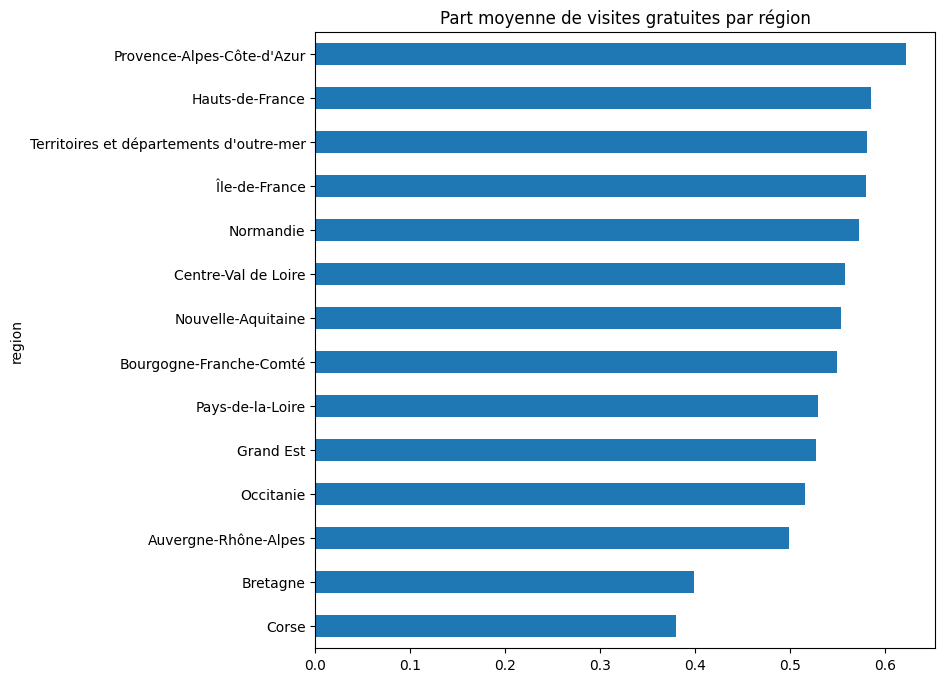

In [14]:
#Par région
df.groupby("region")["part_gratuit"].mean().sort_values().plot(kind="barh", figsize=(8,8))
plt.title("Part moyenne de visites gratuites par région")
plt.show()


## Analyse de l'âge des musées (?)

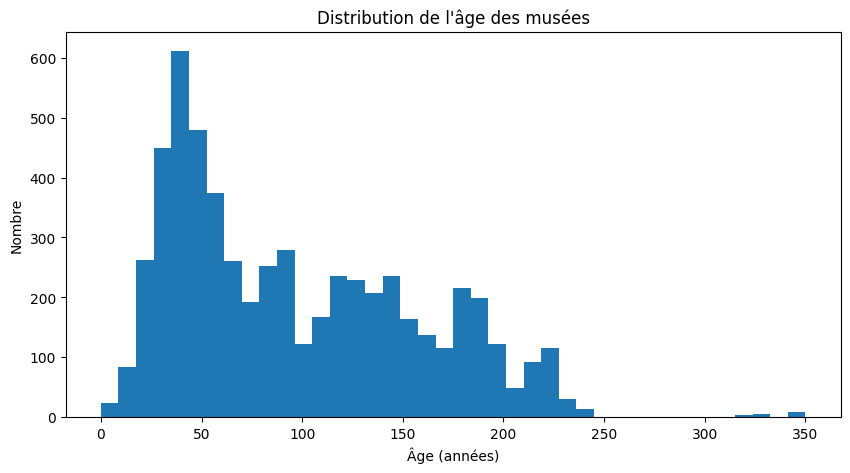

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df["age_musee"].dropna(), bins=40)
plt.title("Distribution de l'âge des musées")
plt.xlabel("Âge (années)")
plt.ylabel("Nombre")
plt.show()


# Régressions 

In [23]:
df_reg = df.copy()

# 1. variable cible
df_reg["y"] = np.log1p(df_reg["total"]) #on prend log(1+total) pr pas avoir log(0)

# 2. log du lag
df_reg["lag_y"] = np.log1p(df_reg["total_t_1"])

# 3. variables explicatives retenues
vars_kept = [
    "age_musee", "part_gratuit", "part_scolaires",
    "part_individuels", "lag_y", "est_idf"
]

# 4. retirer les NA
df_reg = df_reg.dropna(subset=vars_kept + ["y"])

# 5. prêt pour régression simple ou multiple
df_reg.head()



,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,has_excel,est_idf,y,lag_y
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,7.451102,3808.0,55.0,0,4550.0,-0.163077,1,0,8.245122,8.423102
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,7.451102,2444.0,57.0,0,3114.0,-0.215157,1,0,7.801800,8.043984
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,7.451102,3590.0,58.0,0,2444.0,0.468903,1,0,8.186186,7.801800
5,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2019,1104.0,2100.0,...,7.451102,3204.0,59.0,0,3590.0,-0.107521,1,0,8.072467,8.186186
6,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2020,783.0,205.0,...,7.451102,988.0,60.0,0,3204.0,-0.691635,1,0,6.896694,8.072467


## selon âge du musée

In [24]:
import statsmodels.api as sm

X = sm.add_constant(df_reg["age_musee"])
y = df_reg["y"]

model_age = sm.OLS(y, X).fit()
print(model_age.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           7.51e-41
Time:                        17:56:14   Log-Likelihood:                -7461.6
No. Observations:                4087   AIC:                         1.493e+04
Df Residuals:                    4085   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8755      0.044    200.607      0.0

Le coefficient associé est 0.0052 : cela signifie qu’un an d’ancienneté supplémentaire accroît la fréquentation d’environ 0,52 %.
Par exemple, un musée 20 ans plus ancien aura une fréquentation environ 10 % supérieure, toutes choses égales par ailleurs.
Le R² de 0.043 indique que l’âge n’explique qu’une faible part des différences de fréquentation : d’autres facteurs jouent un rôle beaucoup plus important (localisation, type de musée, taille, gratuité, etc.).

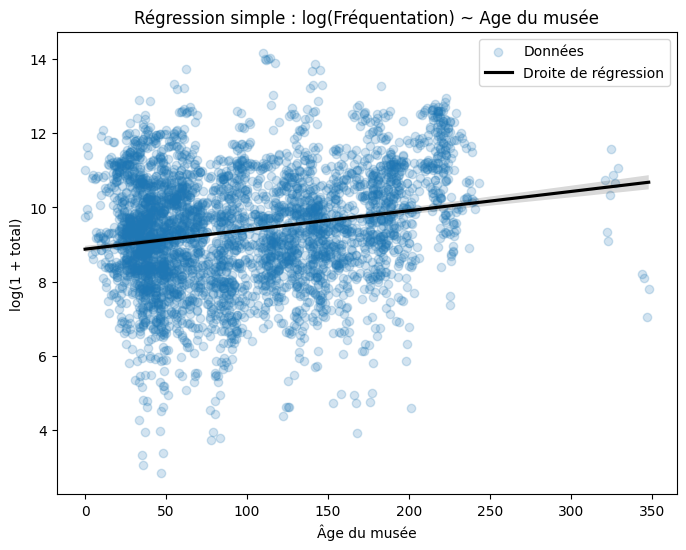

In [25]:
import seaborn as sns

# Scatter des points
plt.figure(figsize=(8,6))
plt.scatter(df_reg["age_musee"], df_reg["y"], alpha=0.2, label="Données")

# Prédictions de la droite
X_plot = sm.add_constant(df_reg["age_musee"])
df_reg["y_pred"] = model_age.predict(X_plot)

# Tracer la droite de régression (en noir)
sns.regplot(
    x=df_reg["age_musee"],
    y=df_reg["y"],
    scatter=False,
    color="black",
    label="Droite de régression"
)

plt.xlabel("Âge du musée")
plt.ylabel("log(1 + total)")
plt.title("Régression simple : log(Fréquentation) ~ Age du musée")
plt.legend()
plt.show()


## Si musée est en IdF

In [26]:
X = sm.add_constant(df_reg["est_idf"])
model_idf = sm.OLS(df_reg["y"], X).fit()
model_idf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     51.87
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           7.02e-13
Time:                        17:56:18   Log-Likelihood:                -7525.5
No. Observations:                4087   AIC:                         1.505e+04
Df Residuals:                    4085   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3181      0.026    365.312      0.000       9.268       9.368
est_idf        0.5211      0.072      7.202      0.000       0.379       0.663
==============================================================================
Omnibus:                       77.511   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.173
Skew:                          -0.293   Prob(JB):                     7.14e-20
Kurtosis:                       3.418   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

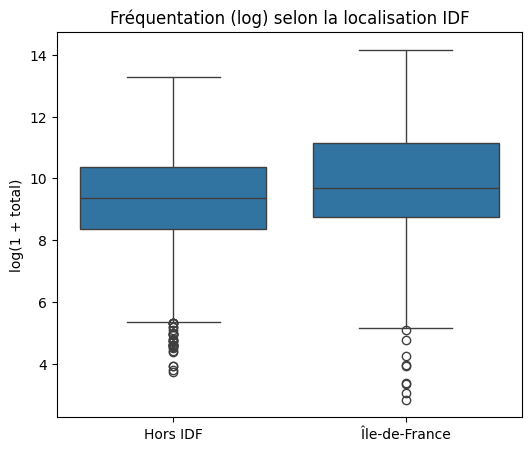

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df_reg["est_idf"], y=df_reg["y"])
plt.xticks([0,1], ["Hors IDF", "Île-de-France"])
plt.title("Fréquentation (log) selon la localisation IDF")
plt.xlabel("")
plt.ylabel("log(1 + total)")
plt.show()



Le boxplot met clairement en évidence un décalage vers le haut de la distribution de la fréquentation (en log) pour les musées situés en Île-de-France.

Alors que les deux distributions sont très dispersées, ce qui reflète l’hétérogénéité des musées tant en IDF qu’en province, la médiane francilienne est plus élevée, et le troisième quartile atteint des niveaux plus importants.

Ce résultat est cohérent avec la régression simple y ~ est_idf, qui estime un coefficient positif et significatif (≈ 0.52), indiquant qu’un musée IDF présente en moyenne une fréquentation supérieure d’environ +68 % à un musée similaire hors IDF.

Cependant, la dispersion interne de chaque groupe explique que le R² ne soit que de 1,3 % : si l’IDF est un facteur structurel important, il est loin d’être suffisant à lui seul pour expliquer les différences de fréquentation. D’autres variables (taille, catégorie, attractivité touristique, notoriété) joueront un rôle majeur dans les modèles multiples.

## part scolaire


In [28]:
X = sm.add_constant(df_reg["part_scolaires"])
model_sco = sm.OLS(df_reg["y"], X).fit()
model_sco.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     45.70
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.58e-11
Time:                        17:56:25   Log-Likelihood:                -7528.5
No. Observations:                4087   AIC:                         1.506e+04
Df Residuals:                    4085   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5455      0.034    281.488      0.000       9.479       9.612
part_scolaires    -1.0648      0.158     -6.760      0.000      -1.374      -0.756
==============================================================================
Omnibus:                       93.103   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.959
Skew:                          -0.319   Prob(JB):                     2.19e-24
Kurtosis:                       3.484   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proportion de visites scolaires est fortement et significativement associée à une fréquentation plus faible : le coefficient estimé (≈ –1.06) indique qu’une hausse de 10 points de pourcentage de la part de scolaires réduit d’environ 10 % la fréquentation totale attendue.

Ce résultat ne doit pas être interprété comme un effet causal de la présence de scolaires, mais comme un marqueur structurel du type de musée. Les musées accueillant majoritairement des scolaires sont souvent de petite taille, centrés sur l’éducation ou l’histoire locale, et naturellement moins touristiques.

Comme l’indique le R² limité (1,1 %), cette variable ne suffit pas à expliquer les différences de fréquentation, mais elle capture un aspect important de la typologie des musées.

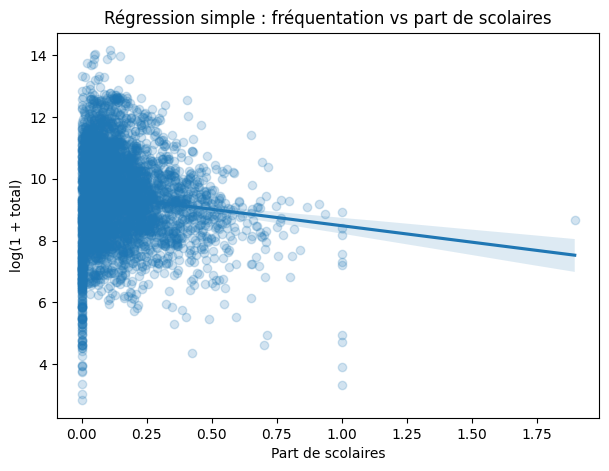

In [29]:
plt.figure(figsize=(7,5))
sns.regplot(x=df_reg["part_scolaires"], y=df_reg["y"], scatter_kws={'alpha':0.2})
plt.xlabel("Part de scolaires")
plt.ylabel("log(1 + total)")
plt.title("Régression simple : fréquentation vs part de scolaires")
plt.show()


## total_n_1

In [30]:
X = sm.add_constant(df_reg["lag_y"])
model_lag = sm.OLS(df_reg["y"], X).fit()
model_lag.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5275.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:22:19   Log-Likelihood:                -5857.0
No. Observations:                4087   AIC:                         1.172e+04
Df Residuals:                    4085   BIC:                         1.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9985      0.076     52.739      0.000       3.850       4.147
lag_y          0.5835      0.008     72.628      0.000       0.568       0.599
==============================================================================
Omnibus:                     1900.751   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27120.350
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                      15.070   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

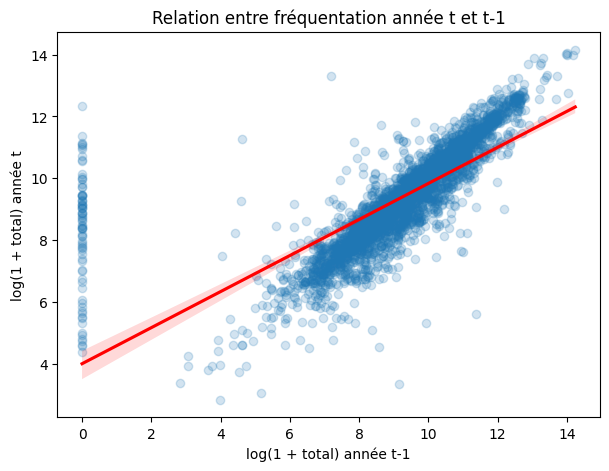

In [31]:
plt.figure(figsize=(7,5))
sns.regplot(
    x=df_reg["lag_y"],
    y=df_reg["y"],
    scatter_kws={'alpha':0.2},
    line_kws={'color':'red'}
)
plt.xlabel("log(1 + total) année t-1")
plt.ylabel("log(1 + total) année t")
plt.title("Relation entre fréquentation année t et t-1")
plt.show()


La régression simple de la fréquentation (en log) sur sa valeur retardée montre que la fréquentation passée est de loin le meilleur prédicteur de la fréquentation actuelle. Le coefficient associé à lag_y est élevé (0.58) et fortement significatif (t = 72.6, p < 0.001), ce qui indique une inertie très forte dans les niveaux d’affluence : les musées conservent une attractivité relativement stable d’une année sur l’autre.

Le R² atteint 0.564, un niveau exceptionnel pour un modèle univarié, très supérieur à celui obtenu avec des variables structurelles (âge, part scolaire). Cela signifie que plus de la moitié de la variance observée dans les fréquentations annuelles s’explique uniquement par la fréquentation de l’année précédente.

Cette dynamique inertielle est attendue dans le secteur muséal : à caractéristiques constantes, les musées attirent des volumes de visiteurs relativement réguliers, modulés ensuite par des variations liées aux expositions temporaires, aux rénovations, aux événements touristiques ou économiques.